<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Dahemo76/blob/main/EDA2dointento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

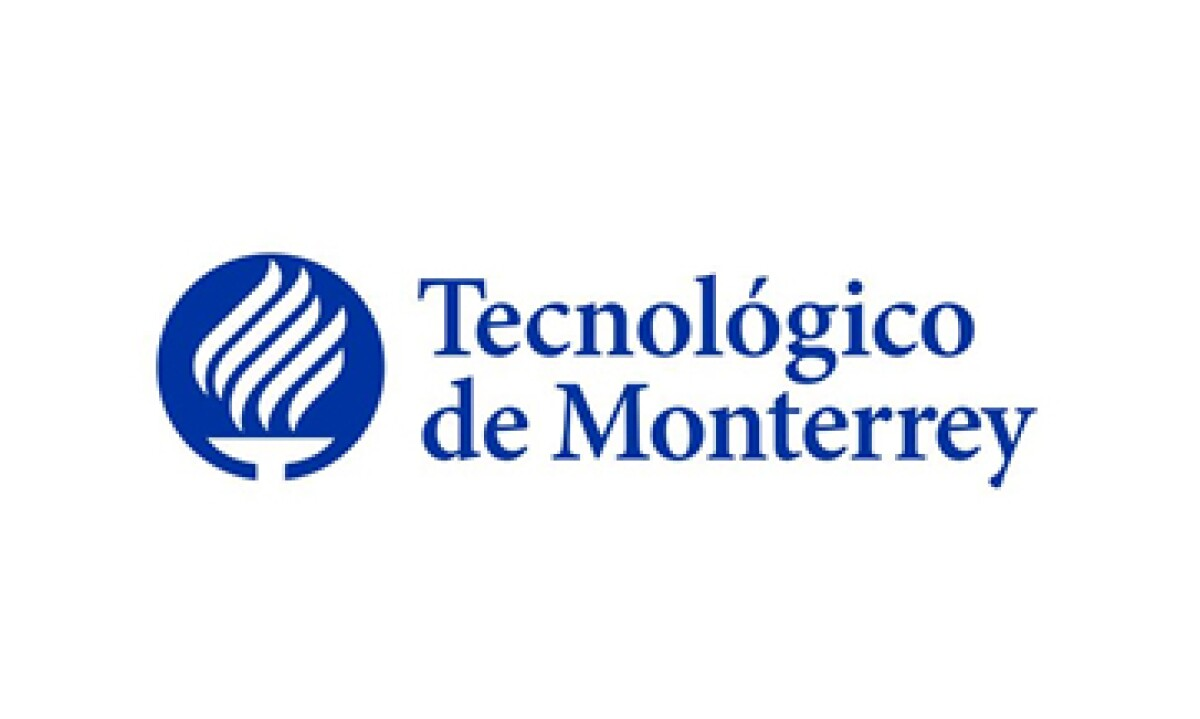

#**Maestría en Inteligencia Artificial Aplicada**
##**Proyecto Integrador**
###Tecnológico de Monterrey
###Prof Gretel Barceló Alonso

### **Semana 3**
####**Avance 2:EDA**
# Equipo 1
#**Rodrigo Ruiz Gonzalez Matricula : A01793081**
#**Daniel Hernandez Mora Matricula : A01793538**
#**Juan Sebastián Téllez López Matricula : A01793859**

# **Análisis Exploratorio de Datos(EDA)**

El EDA nos  ayudará a visualizar y comprender la distribución de cada variable, como la frecuencia de llamadas realizadas en diferentes momentos del día y cómo se relaciona con factores como la demografía del cliente, el estado de morosidad y el historial de pagos. Tambien nos ayudará a descubrir problemas de calidad de datos, como valores faltantes, valores atípicos o inconsistencias, que pueden afectar significativamente el rendimiento de su modelo de ML a utilizar, por lo que el identificar y abordar estos problemas desde el principio, puede mejorar sustancialmente la confiabilidad y precisión de las predicciones de nuestro modelo.


El Análisis Exploratorio de Datos (EDA) proporciona información sobre los datos, ayudando a identificar patrones, anomalías y relaciones entre variables. especialmente cuando se trata de conjuntos de datos como el de nosotros, que implica comprender el comportamiento del cliente e identificar el mejor momento para contactar a clientes morosos, por lo que nos puede puede proporcionar información que mejore la interpretación del modelo de ML, lo que facilitará la comprensión de los factores que influyen en sus predicciones

# Importar librerias

Es importante usar las siguientes librerias porque:

- El análisis de datos a menudo implica trabajar con datos estructurados y pandas destaca en esta tarea.
- Simplifica la limpieza, transformación y análisis de datos en comparación con el uso de listas o diccionarios de Python sin formato.
- La estructura DataFrame permite operaciones intuitivas basadas en columnas (agregar, eliminar, modificar columnas).
- Proporciona métodos integrados para limpiar, filtrar, agrupar y unir datos.

In [32]:
import pandas as pd
import datetime
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Importamos nuestro input

Nuestro Dataset está compuesto por 43 columnas con 557729 renglones, almacenados en un archivo con extension CSV

In [33]:
#Archivo unificado y validado por cliente
df = pd.read_csv("input_final.csv", sep=',', encoding ="latin-1")
df.head(5)

,DOCUMENTO,PRIORIDAD,MOTIVO_NO_PAGO,DESC_ACTIVIDAD,GENERO,EDAD,HORA,HORA_OK,RANGO_HORA,RANGO_HORA2,...,PRIM_CTA,MORA_TEMPRANA,MANTENIDO,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,NEGOCIACION_ACTIVA,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,MARCA_TIPO_CARTERA
0,11000000821,5,NO MOTIVO,Â Asalariados.,F,23,15:45:12,15,Tarde,Tarde,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG
1,11000000821,5,NO MOTIVO,Â Asalariados.,F,23,9:50:27,9,Mañana,Mañana,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG
2,11000000821,21,ASA_REDUCCION_INGRESOS,Â Asalariados.,F,23,9:49:51,9,Mañana,Mañana,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG
3,11000000821,5,SIN_ACCESO_A_CANALES,Â Asalariados.,F,23,10:02:47,10,Mañana,Mañana,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG
4,11000000821,5,ASA_REDUCCION_INGRESOS,Â Asalariados.,F,23,14:23:01,14,Tarde,Mediodia,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG


# **Resumen Estadístico**

EL resumen estadístico es útil para comprender la distribución de las variables numéricas en el dataset y para identificar posibles valores atípicos o anomalías. Este resumen incluye:

- **count**: El número de registros que no son NaN (Not a Number) para cada
variable.
- **mean**: La media aritmética de los valores no NaN para cada variable.
- **std**: La desviación estándar de los valores no NaN para cada variable.
- **min**: El valor mínimo no NaN para cada variable.
- **25%**: El percentil 25% de los valores no NaN para cada variable (el primer cuartil).
- **50%**: El percentil 50% de los valores no NaN para cada variable (la mediana).
- **75%**: El percentil 75% de los valores no NaN para cada variable (el tercer cuartil).
- **max**: El valor máximo no NaN para cada variable.

In [34]:
df.describe()

,DOCUMENTO,PRIORIDAD,EDAD,HORA_OK,MORA_INICIAL,MORA_ACTUAL,C_RIESGO,DIAS_ACTUAL,CICLO_OBLIG,CED_SIN_DIG,DIAS_OBLIG,DIAS_CL,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS
count,5.577290e+05,557729.000000,557729.000000,557729.000000,557729.000000,557729.000000,557729.000000,384371.000000,557729.000000,5.577290e+05,557729.000000,557729.000000,557729.000000,557729.000000,557729.000000
mean,5.019540e+09,12.822460,42.349327,11.882504,46.778041,45.762978,403.531993,53.681948,23.911335,5.017189e+08,33.561475,33.561475,39.161595,23.011113,3.013985
std,5.434164e+09,11.955382,13.697680,2.932931,21.423601,38.022923,338.879839,25.500609,8.803528,5.090475e+08,23.040940,23.040940,40.493347,36.705988,2.467757
min,1.859640e+05,0.000000,16.000000,6.000000,30.000000,0.000000,-99.000000,2.000000,0.000000,8.596400e+04,4.000000,4.000000,1.000000,0.000000,1.000000
25%,1.396569e+08,5.000000,32.000000,9.000000,30.000000,0.000000,65.000000,36.000000,16.000000,3.965690e+07,13.000000,13.000000,15.000000,2.000000,1.000000
50%,1.808310e+08,5.000000,40.000000,11.000000,30.000000,60.000000,391.000000,48.000000,31.000000,8.083096e+07,28.000000,28.000000,24.000000,6.000000,2.000000
75%,1.104574e+10,21.000000,52.000000,14.000000,60.000000,60.000000,702.000000,73.000000,31.000000,1.045741e+09,45.000000,45.000000,49.000000,31.000000,4.000000
max,1.200001e+10,52.000000,94.000000,19.000000,180.000000,210.000000,998.000000,184.000000,31.000000,2.000012e+09,165.000000,165.000000,620.000000,585.000000,24.000000


Revisamos el numero total de registros en nuestro Dataset

In [35]:
new_var = len(df)
new_var

557729

Visualizamos el  resumen informativo del DataFrame, que incluye:

- **Clase de objeto**: El tipo de objeto del DataFrame, que en este caso es "DataFrame".
- **Dimensiones**: El número de filas y columnas en el DataFrame.
- **Tipos de datos**: Los tipos de datos de cada columna en el DataFrame.
- **Memoria**: La cantidad de memoria utilizada por el DataFrame.
- **Resumen de datos no nulos**: El número de valores no nulos (que no son NaN) para cada columna en el DataFrame.

Adicionalmente en nuestro caso, nos proporciona información valiosa como:

- Cuántas filas y columnas tiene el dataset.
- Qué tipo de datos contiene cada columna (números, texto, fechas, etc.).
- Si hay datos faltantes en alguna columna y en qué cantidad.
- Cuánta memoria utiliza el dataset.


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557729 entries, 0 to 557728
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DOCUMENTO                  557729 non-null  int64  
 1   PRIORIDAD                  557729 non-null  int64  
 2   MOTIVO_NO_PAGO             557729 non-null  object 
 3   DESC_ACTIVIDAD             557729 non-null  object 
 4   GENERO                     557729 non-null  object 
 5   EDAD                       557729 non-null  int64  
 6   HORA                       557729 non-null  object 
 7   HORA_OK                    557729 non-null  int64  
 8   RANGO_HORA                 557729 non-null  object 
 9   RANGO_HORA2                557729 non-null  object 
 10  SEGMENTO_CLIENTE           557729 non-null  object 
 11  RIESGO_ACTUAL              381931 non-null  object 
 12  RECUPERACION               557729 non-null  object 
 13  MORA_INICIAL               55

Validamos los nombres de todas las columnas.

In [37]:
df.columns

Index(['DOCUMENTO', 'PRIORIDAD', 'MOTIVO_NO_PAGO', 'DESC_ACTIVIDAD', 'GENERO',
       'EDAD', 'HORA', 'HORA_OK', 'RANGO_HORA', 'RANGO_HORA2',
       'SEGMENTO_CLIENTE', 'RIESGO_ACTUAL', 'RECUPERACION', 'MORA_INICIAL',
       'MORA_ACTUAL', 'C_RIESGO', 'ESTADO_ICS_ACTUAL', 'DIAS_ACTUAL',
       'CICLO_OBLIG', 'CIUDAD', 'CED_SIN_DIG', 'NOMBRES', 'SUB_PRODUCTO',
       'SALDO_OBLIG', 'MORA_OBLIG', 'DIAS_OBLIG', 'TIPO_CLIENTE', 'SALDO_CL',
       'RANGO_SALDO', 'DIAS_CL', 'RANGO_CL', 'SCORE', 'F_APERTURA', 'PRIM_CTA',
       'MORA_TEMPRANA', 'MANTENIDO', 'ACCION_MEJOR_CONTACTO',
       'EFECTO_MEJOR_CONTACTO', 'NEGOCIACION_ACTIVA', 'CANTIDAD_GESTIONES',
       'GESTION_LLAMADAS', 'CONTEO_CONTACTOS_DIRECTOS', 'MARCA_TIPO_CARTERA'],
      dtype='object')

Utilizando el código `variables.describe()` obtendremos un resumen estadístico de las variables numéricas, dandonos visión de los siguientes aspesctos:

- **Comprensión de la distribución de dato**s: Mediante el análisi de información como la media, la mediana, la moda, la desviación estándar, el mínimo y el máximo de cada variable numérica, lo cual ayuda a comprender la distribución de los datos y cómo se distribuyen los valores alrededor de la media.
- **Identificación de valores atípicos**: Si algunas variables presentan valores muy alejados de la media o la distribución general. Estos valores atípicos podrían afectar la precisión del análisis, por lo que es importante considerarlos y decidir cómo manejarlos (por ejemplo, eliminarlos o transformarlos).
- **Comparación de variables**: Al comparar las estadísticas descriptivas de diferentes variables, puedes identificar patrones y relaciones entre ellas, lo cual podria ayudarnos  a comprender mejor cómo se relacionan las diferentes características de los clientes morosos.

# **Columnas de identificación**

Los identificadores son nombres únicos que se asignan a elementos del programa, como variables, funciones, clases, etiquetas de instrucción, entre otros. Estos nombres sirven para referirse a esos elementos de manera clara y consistente en el código, haciendo que el programa sea más legible, comprensible y fácil de mantener

seleccionamos tres columnas específicas ('DOCUMENTO', 'CED_SIN_DIG' y 'NOMBRES') de los nombres de las columnas y las asignamos a un nuevo DataFrame llamado identificadores, estos no aportan datos significativos al modelo, pero nos permiten identicar los componentes de la tabla.


In [38]:
identificadores = df.loc[:,['DOCUMENTO','CED_SIN_DIG','NOMBRES']]
identificadores.head(5)

,DOCUMENTO,CED_SIN_DIG,NOMBRES
0,11000000821,1000000821,ANA . MALAVER RODRIGUEZ
1,11000000821,1000000821,ANA . MALAVER RODRIGUEZ
2,11000000821,1000000821,ANA . MALAVER RODRIGUEZ
3,11000000821,1000000821,ANA . MALAVER RODRIGUEZ
4,11000000821,1000000821,ANA . MALAVER RODRIGUEZ


# **Variables**

Las variables seleccionadas son : ***'PRIORIDAD', 'MOTIVO_NO_PAGO','DESC_ACTIVIDAD', 'GENERO', 'EDAD', 'SEGMENTO_CLIENTE', 'RIESGO_ACTUAL','RECUPERACION, 'MORA_INICIAL', 'MORA_ACTUAL', 'C_RIESGO', 'ESTADO_ICS_ACTUAL', 'DIAS_ACTUAL', 'CICLO_OBLIG', 'CIUDAD', 'SUB_PRODUCTO', 'SALDO_OBLIG', 'MORA_OBLIG', 'DIAS_OBLIG', 'TIPO_CLIENTE', 'SALDO_CL', 'RANGO_SALDO', 'DIAS_CL', 'RANGO_CL', 'SCORE', 'F_APERTURA', 'PRIM_CTA', 'MORA_TEMPRANA', 'MANTENIDO', 'ACCION_MEJOR_CONTACTO', 'EFECTO_MEJOR_CONTACTO', 'NEGOCIACION_ACTIVA', 'CANTIDAD_GESTIONES', 'GESTION_LLAMADAS', 'CONTEO_CONTACTOS_DIRECTOS', 'MARCA_TIPO_CARTERA', 'HORA', 'HORA_OK', 'RANGO_HORA' y 'RANGO_HORA2***

Al identificar las variables y sus características, podremos comprender la naturaleza de nuestro Dataset, la estructura del conjunto de datos y las relaciones entre las variables, lo cual nos  ayudará a:

- Comprender qué factores influyen en la morosidad de los clientes.
- Identificar los mejores momentos del día para contactar a los clientes morosos.
- Segmentar a los clientes en grupos con diferentes características de morosidad y comportamiento de pago.
- Desarrollar estrategias de cobranza personalizadas para cada segmento de clientes.
- Evaluar la efectividad de las intervenciones de cobranza.

In [39]:
variables = df.loc[:,['PRIORIDAD', 'MOTIVO_NO_PAGO', 'DESC_ACTIVIDAD', 'GENERO','EDAD','SEGMENTO_CLIENTE', 'RIESGO_ACTUAL', 'RECUPERACION', 'MORA_INICIAL',
                     'MORA_ACTUAL', 'C_RIESGO', 'ESTADO_ICS_ACTUAL', 'DIAS_ACTUAL','CICLO_OBLIG', 'CIUDAD', 'SUB_PRODUCTO','SALDO_OBLIG', 'MORA_OBLIG',
                     'DIAS_OBLIG', 'TIPO_CLIENTE', 'SALDO_CL','RANGO_SALDO', 'DIAS_CL', 'RANGO_CL', 'SCORE', 'F_APERTURA', 'PRIM_CTA','MORA_TEMPRANA',
                     'MANTENIDO', 'ACCION_MEJOR_CONTACTO','EFECTO_MEJOR_CONTACTO', 'NEGOCIACION_ACTIVA', 'CANTIDAD_GESTIONES','GESTION_LLAMADAS',
                     'CONTEO_CONTACTOS_DIRECTOS', 'MARCA_TIPO_CARTERA', 'HORA', 'HORA_OK', 'RANGO_HORA', 'RANGO_HORA2']]
variables.head(5)

,PRIORIDAD,MOTIVO_NO_PAGO,DESC_ACTIVIDAD,GENERO,EDAD,SEGMENTO_CLIENTE,RIESGO_ACTUAL,RECUPERACION,MORA_INICIAL,MORA_ACTUAL,...,EFECTO_MEJOR_CONTACTO,NEGOCIACION_ACTIVA,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,MARCA_TIPO_CARTERA,HORA,HORA_OK,RANGO_HORA,RANGO_HORA2
0,5,NO MOTIVO,Â Asalariados.,F,23,MONO_TC,NaN,NORMALIZADO,30,0,...,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG,15:45:12,15,Tarde,Tarde
1,5,NO MOTIVO,Â Asalariados.,F,23,MONO_TC,NaN,NORMALIZADO,30,0,...,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG,9:50:27,9,Mañana,Mañana
2,21,ASA_REDUCCION_INGRESOS,Â Asalariados.,F,23,MONO_TC,NaN,NORMALIZADO,30,0,...,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG,9:49:51,9,Mañana,Mañana
3,5,SIN_ACCESO_A_CANALES,Â Asalariados.,F,23,MONO_TC,NaN,NORMALIZADO,30,0,...,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG,10:02:47,10,Mañana,Mañana
4,5,ASA_REDUCCION_INGRESOS,Â Asalariados.,F,23,MONO_TC,NaN,NORMALIZADO,30,0,...,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG,14:23:01,14,Tarde,Mediodia


# **Resumen estadístico de las variables numéricas**

Visualizaremos rápidamente las estadísticas descriptivas de las variables numéricas más importantes que nos ayuda a:

- Comprender la distribución de los datos en tu dataset.
- Identificar posibles valores atípicos o sesgos en las variables.
- Comparar las características de las variables numéricas.

In [46]:
summary_statistics = variables.describe()
summary_statistics.head()

,PRIORIDAD,EDAD,MORA_INICIAL,MORA_ACTUAL,C_RIESGO,DIAS_ACTUAL,CICLO_OBLIG,DIAS_OBLIG,DIAS_CL,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,HORA_OK
count,557729.000000,557729.000000,557729.000000,557729.000000,557729.000000,384371.000000,557729.000000,557729.000000,557729.000000,557729.000000,557729.000000,557729.000000,557729.000000
mean,12.822460,42.349327,46.778041,45.762978,403.531993,53.681948,23.911335,33.561475,33.561475,39.161595,23.011113,3.013985,11.882504
std,11.955382,13.697680,21.423601,38.022923,338.879839,25.500609,8.803528,23.040940,23.040940,40.493347,36.705988,2.467757,2.932931
min,0.000000,16.000000,30.000000,0.000000,-99.000000,2.000000,0.000000,4.000000,4.000000,1.000000,0.000000,1.000000,6.000000
25%,5.000000,32.000000,30.000000,0.000000,65.000000,36.000000,16.000000,13.000000,13.000000,15.000000,2.000000,1.000000,9.000000


# **Valores Faltantes**

Visualizamos  la cantidad de valores no nulos  para cada variable en el DataFrame, lo cual nos permite identificar si hay variables con una cantidad significativa de valores faltantes. Esto puede ayudarte a evaluar la confiabilidad de los datos y la necesidad de aplicar técnicas de imputación o eliminación de valores faltantes antes del análisis posterior

In [41]:
variables.isnull().sum().sort_values(ascending=False)

RIESGO_ACTUAL                175798
ESTADO_ICS_ACTUAL            173358
DIAS_ACTUAL                  173358
PRIORIDAD                         0
SCORE                             0
F_APERTURA                        0
PRIM_CTA                          0
MORA_TEMPRANA                     0
MANTENIDO                         0
ACCION_MEJOR_CONTACTO             0
EFECTO_MEJOR_CONTACTO             0
NEGOCIACION_ACTIVA                0
DIAS_CL                           0
CANTIDAD_GESTIONES                0
GESTION_LLAMADAS                  0
CONTEO_CONTACTOS_DIRECTOS         0
MARCA_TIPO_CARTERA                0
HORA                              0
HORA_OK                           0
RANGO_HORA                        0
RANGO_CL                          0
SALDO_CL                          0
RANGO_SALDO                       0
MOTIVO_NO_PAGO                    0
DESC_ACTIVIDAD                    0
GENERO                            0
EDAD                              0
SEGMENTO_CLIENTE            

Visualizamos de manera gráfica las estadisticas obtenidas

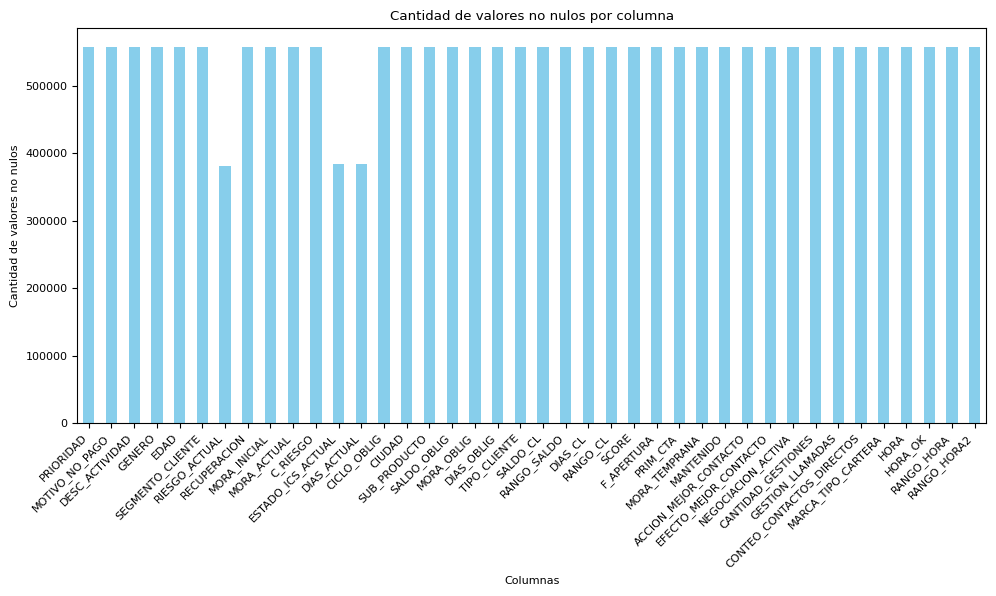

In [42]:
valores_no_nulos = variables.notnull().sum()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
valores_no_nulos.plot(kind='bar', color='skyblue')
plt.title('Cantidad de valores no nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores no nulos')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

Validamos los porcentajes de Información faltante:

In [43]:
missing_data = variables.isnull().sum()
missing_data_percentage = (missing_data / len(variables)) * 100
missing_data_summary = pd.concat([missing_data, missing_data_percentage], axis=1, keys=['Total', 'Porcentaje'])
missing_data_df = pd.DataFrame(missing_data_summary, columns=['Total', 'Porcentaje'])

# Agregar un mensaje antes del DataFrame
total_records = len(variables)
message = f"De un total de {total_records} registros se encuentran los siguientes valores faltantes:\n"
print(message)
missing_data_df.head(50)

De un total de 557729 registros se encuentran los siguientes valores faltantes:



,Total,Porcentaje
PRIORIDAD,0,0.000000
MOTIVO_NO_PAGO,0,0.000000
DESC_ACTIVIDAD,0,0.000000
GENERO,0,0.000000
EDAD,0,0.000000
SEGMENTO_CLIENTE,0,0.000000
RIESGO_ACTUAL,175798,31.520326
RECUPERACION,0,0.000000
MORA_INICIAL,0,0.000000
MORA_ACTUAL,0,0.000000


# **Estadisticas descriptivas para variables numericas y categóricas**

A continuación, vamos a visualizar un resumen con  las estadísticas descriptivas tanto para variables numéricas como categóricas, las cuales son:
- **count**: El número de registros que no son NaN para la variable.
- **mean**: La media aritmética de los valores no NaN.
- **std**: La desviación estándar de los valores no NaN.
- **min**: El valor mínimo no NaN.
- **25%**: El primer cuartil (Q1), que representa el valor por debajo del cual se encuentra el 25% de los datos.
- **50%**: La mediana (Q2), que representa el valor por debajo del cual se encuentra el 50% de los datos y por encima del cual se encuentra el otro 50%.
- **75%**: El tercer cuartil (Q3), que representa el valor por debajo del cual se encuentra el 75% de los datos.
- **max**: El valor máximo no NaN.

Por ejemplo, para nuestro caso se muestra que la edad promedio de los clientes morosos es de 42.34 años, con una desviación estándar de 13.69 años. Esto indica que la mayoría de los clientes se encuentran en un rango de edad de 29 a 55 años aproximadamente.

In [44]:
desc_numericas = variables.describe()

# Estadísticas descriptivas para variables categóricas
desc_categoricas = {}
for columna in df.select_dtypes(include=['object']):
    desc_categoricas[columna] = df[columna].value_counts()

# Mostrar resultados
print("Estadísticas descriptivas para variables numéricas:")
print(desc_numericas)
print("\nEstadísticas descriptivas para variables categóricas:")
for columna, desc in desc_categoricas.items():
    print(f"\n{columna}:")
    print(desc)

Estadísticas descriptivas para variables numéricas:
           PRIORIDAD           EDAD   MORA_INICIAL    MORA_ACTUAL  \
count  557729.000000  557729.000000  557729.000000  557729.000000   
mean       12.822460      42.349327      46.778041      45.762978   
std        11.955382      13.697680      21.423601      38.022923   
min         0.000000      16.000000      30.000000       0.000000   
25%         5.000000      32.000000      30.000000       0.000000   
50%         5.000000      40.000000      30.000000      60.000000   
75%        21.000000      52.000000      60.000000      60.000000   
max        52.000000      94.000000     180.000000     210.000000   

            C_RIESGO    DIAS_ACTUAL    CICLO_OBLIG     DIAS_OBLIG  \
count  557729.000000  384371.000000  557729.000000  557729.000000   
mean      403.531993      53.681948      23.911335      33.561475   
std       338.879839      25.500609       8.803528      23.040940   
min       -99.000000       2.000000       0.000000

# **Outliers Variables Numéricas**

Usanod un diagrama de cajas ("boxplot") visualizaremos la distribución de las variables numéricas, donde la caja central representa el rango intercuartil (IQR), que abarca el 50% central de los datos. Las líneas horizontales dentro de la caja indican los cuartiles Q1 y Q3. Los bigotes (líneas que se extienden desde la caja) muestran la distribución de los valores atípicos(Outliers), los valores atípicos se representan como puntos individuales más allá de los bigotes.

En nuestro caso de estudio podemos ver que a variable "SC_RIESGO" tiene una caja más alta  que el resto de las variables. Esto inidca que la distribución de esta variable  es más dispersa y tiene un mayor sesgo que el resto de las variables.



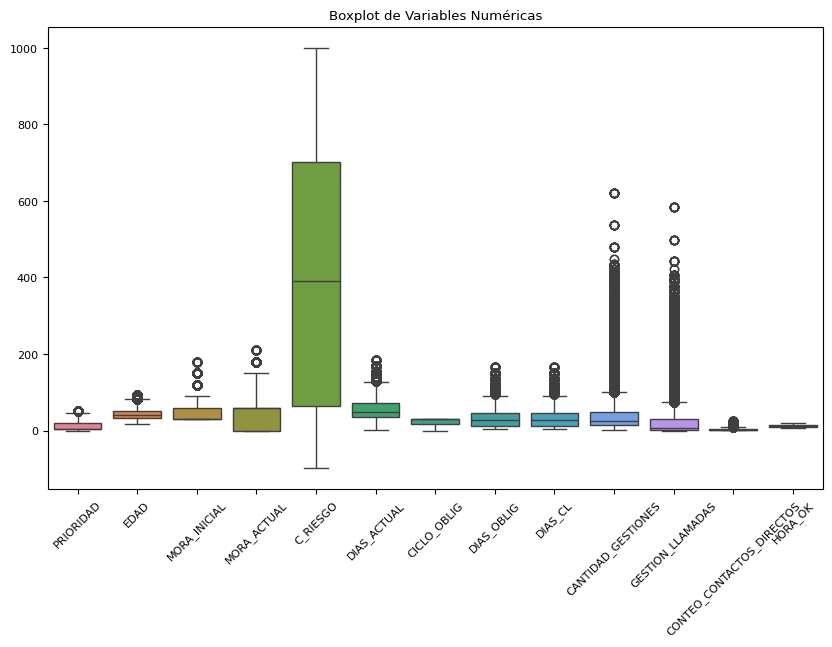

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=variables.select_dtypes(include='number'))
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.title('Boxplot de Variables Numéricas')
plt.show()

***** FALTARIA ANALIZAR EL TEMA DE OULIERS DE ACUERDO AL RESULTADO DE LA GRAFICA****


# Análisis para cada caso particular

### Relaciones entre variables categóricas y numéricas

El análisis de las relaciones entre variables categóricas y numéricas te permite obtener información en los siguientes aspectos:

- **Asociación**: Se busca determinar si existe una asociación entre la variable categórica y la variable numérica. Esto significa evaluar si la distribución de la variable numérica es diferente para cada categoría de la variable categórica.
- **Dependencia**: Se busca determinar si la variable categórica influye o "determina" el valor de la variable numérica. En este caso, la variable categórica se considera la variable explicativa y la variable numérica, la variable respuesta.

Para nuestro caso, vamos a visualizar graficamente cómo las variables categóricas (como "**RANGO_HORA**", "**SEGMENTO_CLIENTE**", **ACCION MEJOR CONTACTO**) se relacionan con las variables numéricas (como "**EDAD**" o "**CANTIDAD DE GESTIONES**").

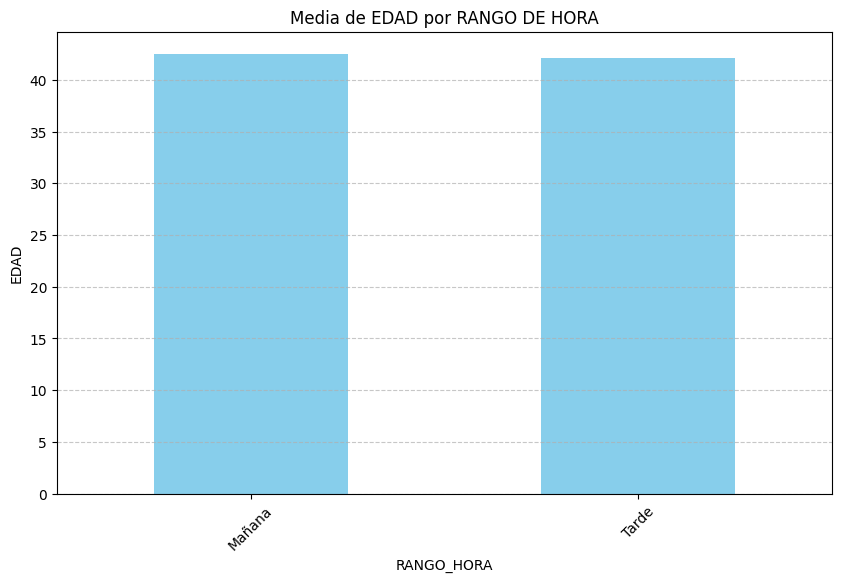

In [16]:
resumen_estadistico = variables.groupby('RANGO_HORA')['EDAD'].mean()  # O puedes usar 'median' en lugar de 'mean' si deseas la mediana

# Crear un gráfico de barras para mostrar la media o la mediana de la variable numérica para cada categoría
plt.figure(figsize=(10, 6))
resumen_estadistico.plot(kind='bar', color='skyblue')
plt.title('Media de EDAD por RANGO DE HORA')
plt.xlabel('RANGO_HORA')
plt.ylabel('EDAD')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de cuadrícula horizontal
plt.show()

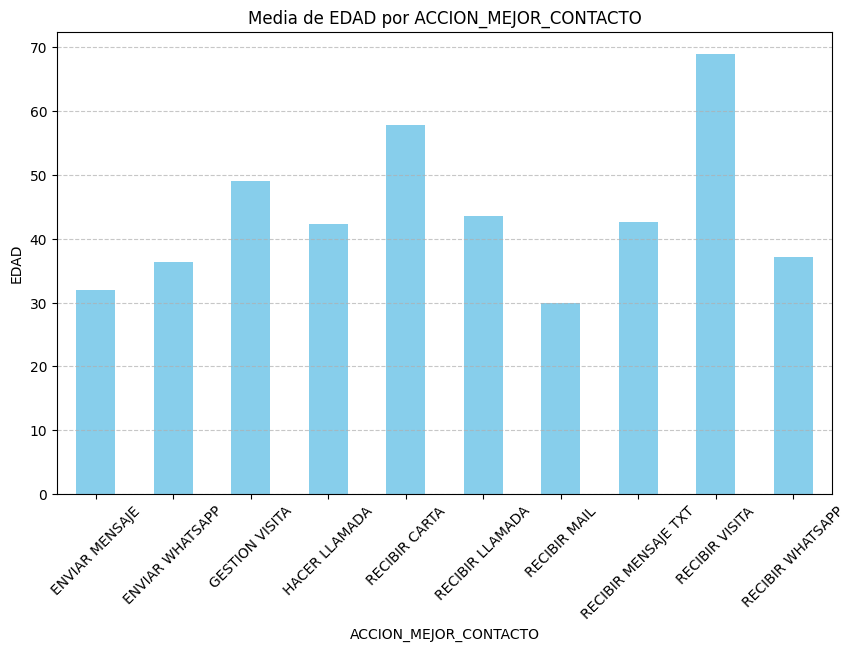

In [17]:
resumen_estadistico2 = variables.groupby('ACCION_MEJOR_CONTACTO')['EDAD'].mean()  # O puedes usar 'median' en lugar de 'mean' si deseas la mediana

# Crear un gráfico de barras para mostrar la media o la mediana de la variable numérica para cada categoría
plt.figure(figsize=(10, 6))
resumen_estadistico2.plot(kind='bar', color='skyblue')
plt.title('Media de EDAD por ACCION_MEJOR_CONTACTO')
plt.xlabel('ACCION_MEJOR_CONTACTO')
plt.ylabel('EDAD')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de cuadrícula horizontal
plt.show()

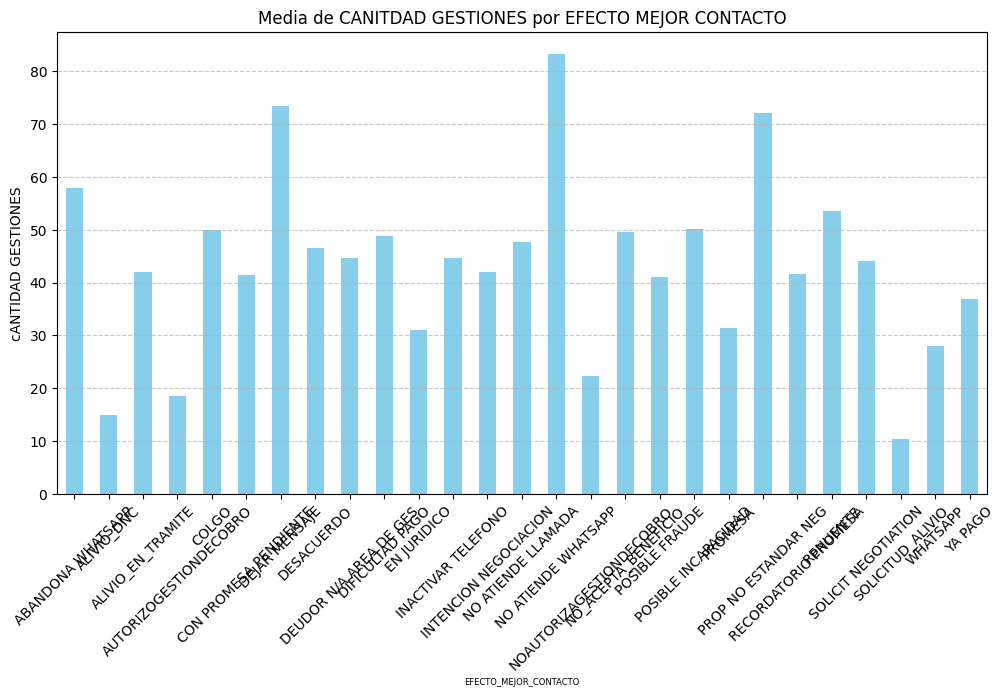

In [18]:
resumen_estadistico3 = variables.groupby('EFECTO_MEJOR_CONTACTO')['CANTIDAD_GESTIONES'].mean()  # O puedes usar 'median' en lugar de 'mean' si deseas la mediana

# Crear un gráfico de barras para mostrar la media o la mediana de la variable numérica para cada categoría
plt.figure(figsize=(12, 6))
resumen_estadistico3.plot(kind='bar', color='skyblue')
plt.title('Media de CANITDAD GESTIONES por EFECTO MEJOR CONTACTO')
plt.xlabel('EFECTO_MEJOR_CONTACTO', fontsize=6)
plt.ylabel('cANTIDAD GESTIONES')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de cuadrícula horizontal
plt.show()

### Cardinalidad de variables Categoricas

La cardinalidad se refiere al número de categorías únicas que existen en una variable categórica y nos ayuda a comprender la complejidad de las variables categóricas, analizando los siguientes aspectos:

- **Comprender la naturaleza de las variables categóricas**: Conocer la cardinalidad te permite identificar si una variable categórica tiene un número manejable de categorías (baja cardinalidad) o un número muy alto (alta cardinalidad).
- **Tomar decisiones sobre la preparación de datos**: La cardinalidad puede influir en las técnicas de codificación de variables categóricas que se utilizarán posteriormente en el análisis. Por ejemplo, las técnicas como "one-hot encoding" pueden ser menos eficientes para variables con alta cardinalidad.
- **Identificar posibles problemas**: Una variable categórica con un número extremadamente alto de categorías podría indicar problemas con la recolección de datos o la necesidad de agrupar categorías similares.

In [19]:
categorical_columns = variables.select_dtypes(include=['object']).columns
categorical_cardinality = pd.DataFrame(columns=['Columna', 'Cardinalidad'])
for col in categorical_columns:
    cardinality = variables[col].nunique()
    categorical_cardinality = categorical_cardinality._append({'Columna': col, 'Cardinalidad': cardinality}, ignore_index=True)
categorical_cardinality.head()

,Columna,Cardinalidad
0,MOTIVO_NO_PAGO,118
1,DESC_ACTIVIDAD,369
2,GENERO,3
3,SEGMENTO_CLIENTE,2
4,RIESGO_ACTUAL,11


In [20]:
# prompt: Mediante el marco de datos categorical_cardinality:

categorical_cardinality.groupby('Columna')['Cardinalidad'].sum()


Columna
ACCION_MEJOR_CONTACTO       10
CIUDAD                     179
DESC_ACTIVIDAD             369
EFECTO_MEJOR_CONTACTO       27
ESTADO_ICS_ACTUAL           12
F_APERTURA                4332
GENERO                       3
HORA                     39707
MANTENIDO                    2
MARCA_TIPO_CARTERA           3
MORA_OBLIG               64599
MORA_TEMPRANA                2
MOTIVO_NO_PAGO             118
NEGOCIACION_ACTIVA           2
PRIM_CTA                     2
RANGO_CL                     6
RANGO_HORA                   2
RANGO_HORA2                  3
RANGO_SALDO                  9
RECUPERACION                 5
RIESGO_ACTUAL               11
SALDO_CL                 64652
SALDO_OBLIG              64628
SCORE                     1030
SEGMENTO_CLIENTE             2
SUB_PRODUCTO                51
TIPO_CLIENTE                 8
Name: Cardinalidad, dtype: object

### Distribuciones sesgadas y transformaciones no lineales

In [21]:
numeric_columns = variables.select_dtypes(include=['float64', 'int64']).columns
skewed_distributions = pd.DataFrame(columns=['Columna', 'Skewness'])
for col in numeric_columns:
    skewness = skew(variables[col])
    skewed_distributions = skewed_distributions._append({'Columna': col, 'Skewness': skewness}, ignore_index=True)
skewed_distributions.head()

,Columna,Skewness
0,PRIORIDAD,1.718381
1,EDAD,0.567993
2,MORA_INICIAL,1.234191
3,MORA_ACTUAL,0.280818
4,C_RIESGO,0.134503


In [22]:
# prompt: Mediante el marco de datos skewed_distributions:

skewed_distributions.groupby('Columna')['Skewness'].agg(['min', 'max', 'mean'])


,min,max,mean
Columna,,,
CANTIDAD_GESTIONES,2.796073,2.796073,2.796073
CICLO_OBLIG,-0.959832,-0.959832,-0.959832
CONTEO_CONTACTOS_DIRECTOS,2.251372,2.251372,2.251372
C_RIESGO,0.134503,0.134503,0.134503
DIAS_ACTUAL,NaN,NaN,NaN
DIAS_CL,1.124326,1.124326,1.124326
DIAS_OBLIG,1.124326,1.124326,1.124326
EDAD,0.567993,0.567993,0.567993
GESTION_LLAMADAS,3.171082,3.171082,3.171082


### Desequilibrio en clases de variable objetivo

In [23]:
class_counts = variables['RANGO_HORA'].value_counts()
class_imbalance = pd.DataFrame({'Clase': class_counts.index, 'Frecuencia': class_counts.values})
class_imbalance

,Clase,Frecuencia
0,Mañana,340809
1,Tarde,216920


<Axes: xlabel='Clase'>

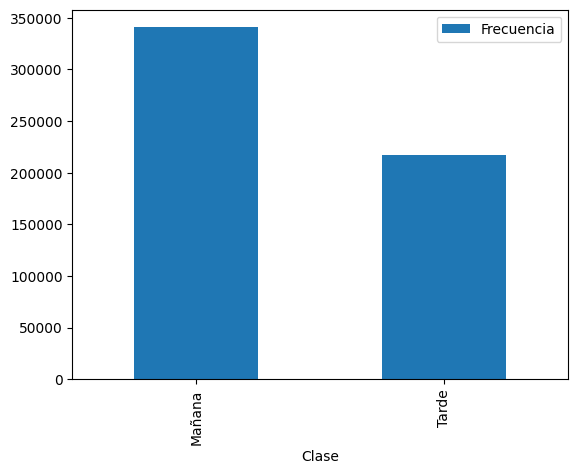

In [24]:
# prompt: Mediante el marco de datos class_imbalance:

class_imbalance.set_index('Clase').plot.bar()


# **Frecuencia de Clases para variables categóricas**

De acuerdo al análisis realizados, vamos a dejar unicamente las siguientes varianles como categóricas.

In [25]:
variables_categoricas = ['GENERO', 'SEGMENTO_CLIENTE', 'RECUPERACION', 'NEGOCIACION_ACTIVA', 'MARCA_TIPO_CARTERA']
df_interes = variables[variables_categoricas]

# Calcular la frecuencia de clases para cada columna
for columna in df_interes.columns:
    frecuencia = df_interes[columna].value_counts()
    print(f"Frecuencia de clases para {columna}:\n{frecuencia}\n")

Frecuencia de clases para GENERO:
GENERO
M    307280
F    250447
D         2
Name: count, dtype: int64

Frecuencia de clases para SEGMENTO_CLIENTE:
SEGMENTO_CLIENTE
MONO_TC     454759
MULTI_TC    102970
Name: count, dtype: int64

Frecuencia de clases para RECUPERACION:
RECUPERACION
DETERIORADO    235794
NORMALIZADO    173358
POR_VENCER      98527
MANTENIDO       34401
RECUPERADO      15649
Name: count, dtype: int64

Frecuencia de clases para NEGOCIACION_ACTIVA:
NEGOCIACION_ACTIVA
NO    488572
SI     69157
Name: count, dtype: int64

Frecuencia de clases para MARCA_TIPO_CARTERA:
MARCA_TIPO_CARTERA
FGA            254878
PROD_DIG       156128
TRADICIONAL    146723
Name: count, dtype: int64



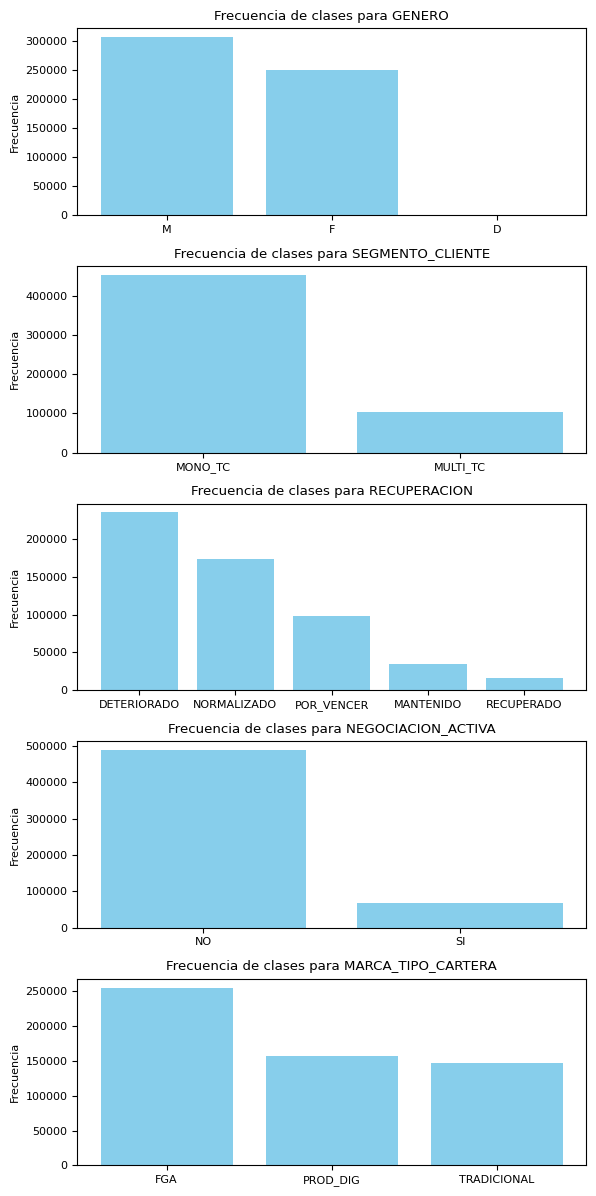

In [27]:
variables_categoricas = ['GENERO', 'SEGMENTO_CLIENTE', 'RECUPERACION', 'NEGOCIACION_ACTIVA', 'MARCA_TIPO_CARTERA']
df_interes = variables[variables_categoricas]

plt.figure(figsize=(6, 12))
plt.rcParams.update({'font.size': 8})  # Tamaño de la fuente

# Calcular y graficar la frecuencia de clases para cada columna
for i, columna in enumerate(df_interes.columns):
    frecuencia = df_interes[columna].value_counts()
    plt.subplot(len(variables_categoricas), 1, i+1)
    plt.bar(frecuencia.index, frecuencia.values, color='skyblue')
    plt.title(f"Frecuencia de clases para {columna}")
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()